In [43]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
demo = pd.read_csv("../datasets/wisc_bc_data.csv")
demo = demo.drop('id',axis=1)
demo.head()
demo['diagnosis'] = demo['diagnosis'].map({'B':0, 'M':1})

y=demo['diagnosis']
X = demo.drop('diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)


In [26]:
demo.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [27]:
demo.shape

(569, 31)

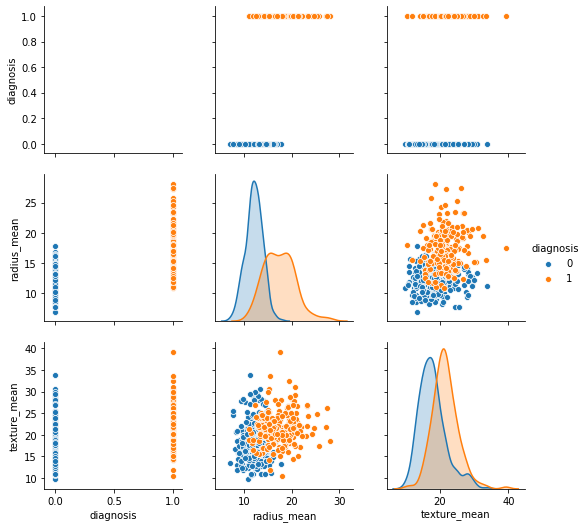

In [28]:
sns.pairplot(demo.iloc[:,:3], hue='diagnosis', diag_kind='kde')

In [29]:
# Building pipeline with scaling
from sklearn.pipeline import Pipeline

mod_scaled = Pipeline((
                     ("sc", StandardScaler()),
                     ("lr", LogisticRegression())
                     ))
mod = mod_scaled.fit(X_train, y_train)
y_pred = mod_scaled.predict(X_test)

In [30]:
print(y_pred)

[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 1]


In [31]:
sc=StandardScaler()
lr = LogisticRegression()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
lr.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(lr.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(lr.score(scaledX_train,y_train))

What is the Testing Accuracy
0.9649122807017544
What is the Training Accuracy
0.9912087912087912


In [32]:
#lr.predict_proba(scaledX_test)

In [33]:
predicted= lr.predict(scaledX_test)

In [34]:
# Checking results using confusion matrix and report`

print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[77  0]
 [ 4 33]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        77
           1       1.00      0.89      0.94        37

    accuracy                           0.96       114
   macro avg       0.98      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [35]:
y_scores = lr.predict_proba(scaledX_test)

In [36]:
from sklearn.metrics import roc_curve

In [39]:
print(y_test.shape)
print(y_scores.shape)

print(y_scores[:,1])
#print(y_test)

(114,)
(114, 2)
[9.51671572e-01 1.00000000e+00 9.97700559e-01 9.99971038e-01
 8.91593389e-04 5.02737111e-02 1.03867070e-04 4.86956218e-02
 2.01872332e-05 1.92288091e-05 3.67356931e-04 6.17532748e-05
 5.99533022e-03 3.28545234e-03 3.18845847e-05 9.99717873e-01
 3.04335809e-05 1.46896917e-03 3.01493109e-01 1.02443293e-05
 7.27915219e-04 1.19974511e-05 9.86790529e-01 2.44363594e-01
 1.55876688e-03 2.07988187e-06 4.09024239e-07 7.65291719e-06
 4.30242464e-02 1.83624652e-03 5.41124469e-03 8.99147602e-01
 7.83263376e-04 2.41919901e-04 8.48984375e-03 8.04240074e-03
 9.99986408e-01 7.75128280e-06 9.99999998e-01 9.99987909e-01
 2.30265890e-04 5.76088497e-04 4.67522119e-03 2.42805047e-04
 9.40953761e-05 1.46163365e-02 2.94604501e-04 9.80397480e-04
 2.62496397e-04 8.42039959e-04 9.95101935e-01 5.31003332e-04
 5.10536357e-05 2.01024381e-02 3.53824819e-06 9.99999939e-01
 9.98929682e-01 9.90093944e-01 9.58304268e-06 1.71148187e-03
 1.47422578e-01 5.00005892e-04 3.51460826e-01 3.00393656e-01
 1.54747

In [41]:
fpr, tpr, thresholds = roc_curve(y_test,y_scores[:,1],pos_label=1)

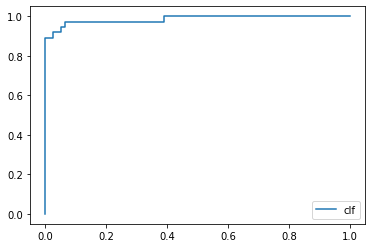

In [51]:
plt.plot(fpr, tpr, label='clf')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_scores[:,1])

0.9856089856089856